<a href="https://colab.research.google.com/github/enzmiguel/predicao-valores-alugel-imoveis-sao-paulo-machine-learning/blob/main/predicao_imoveis_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [56]:
imoveis = pd.read_csv('sao-paulo-properties-april-2019.csv')

In [57]:
imoveis.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [58]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [59]:
imoveis.shape

(13640, 16)

In [60]:
imoveis['Negotiation Type'].value_counts()

,count
Negotiation Type,
rent,7228
sale,6412


In [61]:
vendas = imoveis[imoveis['Negotiation Type'] == 'sale']
alugueis = imoveis[imoveis['Negotiation Type'] == 'rent']

In [62]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6412 entries, 4901 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             6412 non-null   int64  
 1   Condo             6412 non-null   int64  
 2   Size              6412 non-null   int64  
 3   Rooms             6412 non-null   int64  
 4   Toilets           6412 non-null   int64  
 5   Suites            6412 non-null   int64  
 6   Parking           6412 non-null   int64  
 7   Elevator          6412 non-null   int64  
 8   Furnished         6412 non-null   int64  
 9   Swimming Pool     6412 non-null   int64  
 10  New               6412 non-null   int64  
 11  District          6412 non-null   object 
 12  Negotiation Type  6412 non-null   object 
 13  Property Type     6412 non-null   object 
 14  Latitude          6412 non-null   float64
 15  Longitude         6412 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory 

In [63]:
alugueis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [64]:
alugueis.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [65]:
vendas.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890


In [66]:
alugueis.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


In [67]:
vendas.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,6.412000e+03,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,6.086241e+05,537.349813,78.611042,2.320805,2.037742,0.931535,1.326575,0.415471,0.117280,0.539457,0.032283,-22.127513,-43.705547
std,7.404515e+05,624.632473,50.872359,0.714743,0.917844,0.772615,0.751658,0.492841,0.321779,0.498480,0.176765,5.756660,11.271783
min,4.200000e+04,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.734483,-49.337815
25%,2.500000e+05,150.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.592848,-46.673526
50%,3.800000e+05,400.000000,62.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-23.549693,-46.628506
75%,6.790000e+05,700.000000,87.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.512534,-46.533612
max,1.000000e+07,8920.000000,620.000000,6.000000,7.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

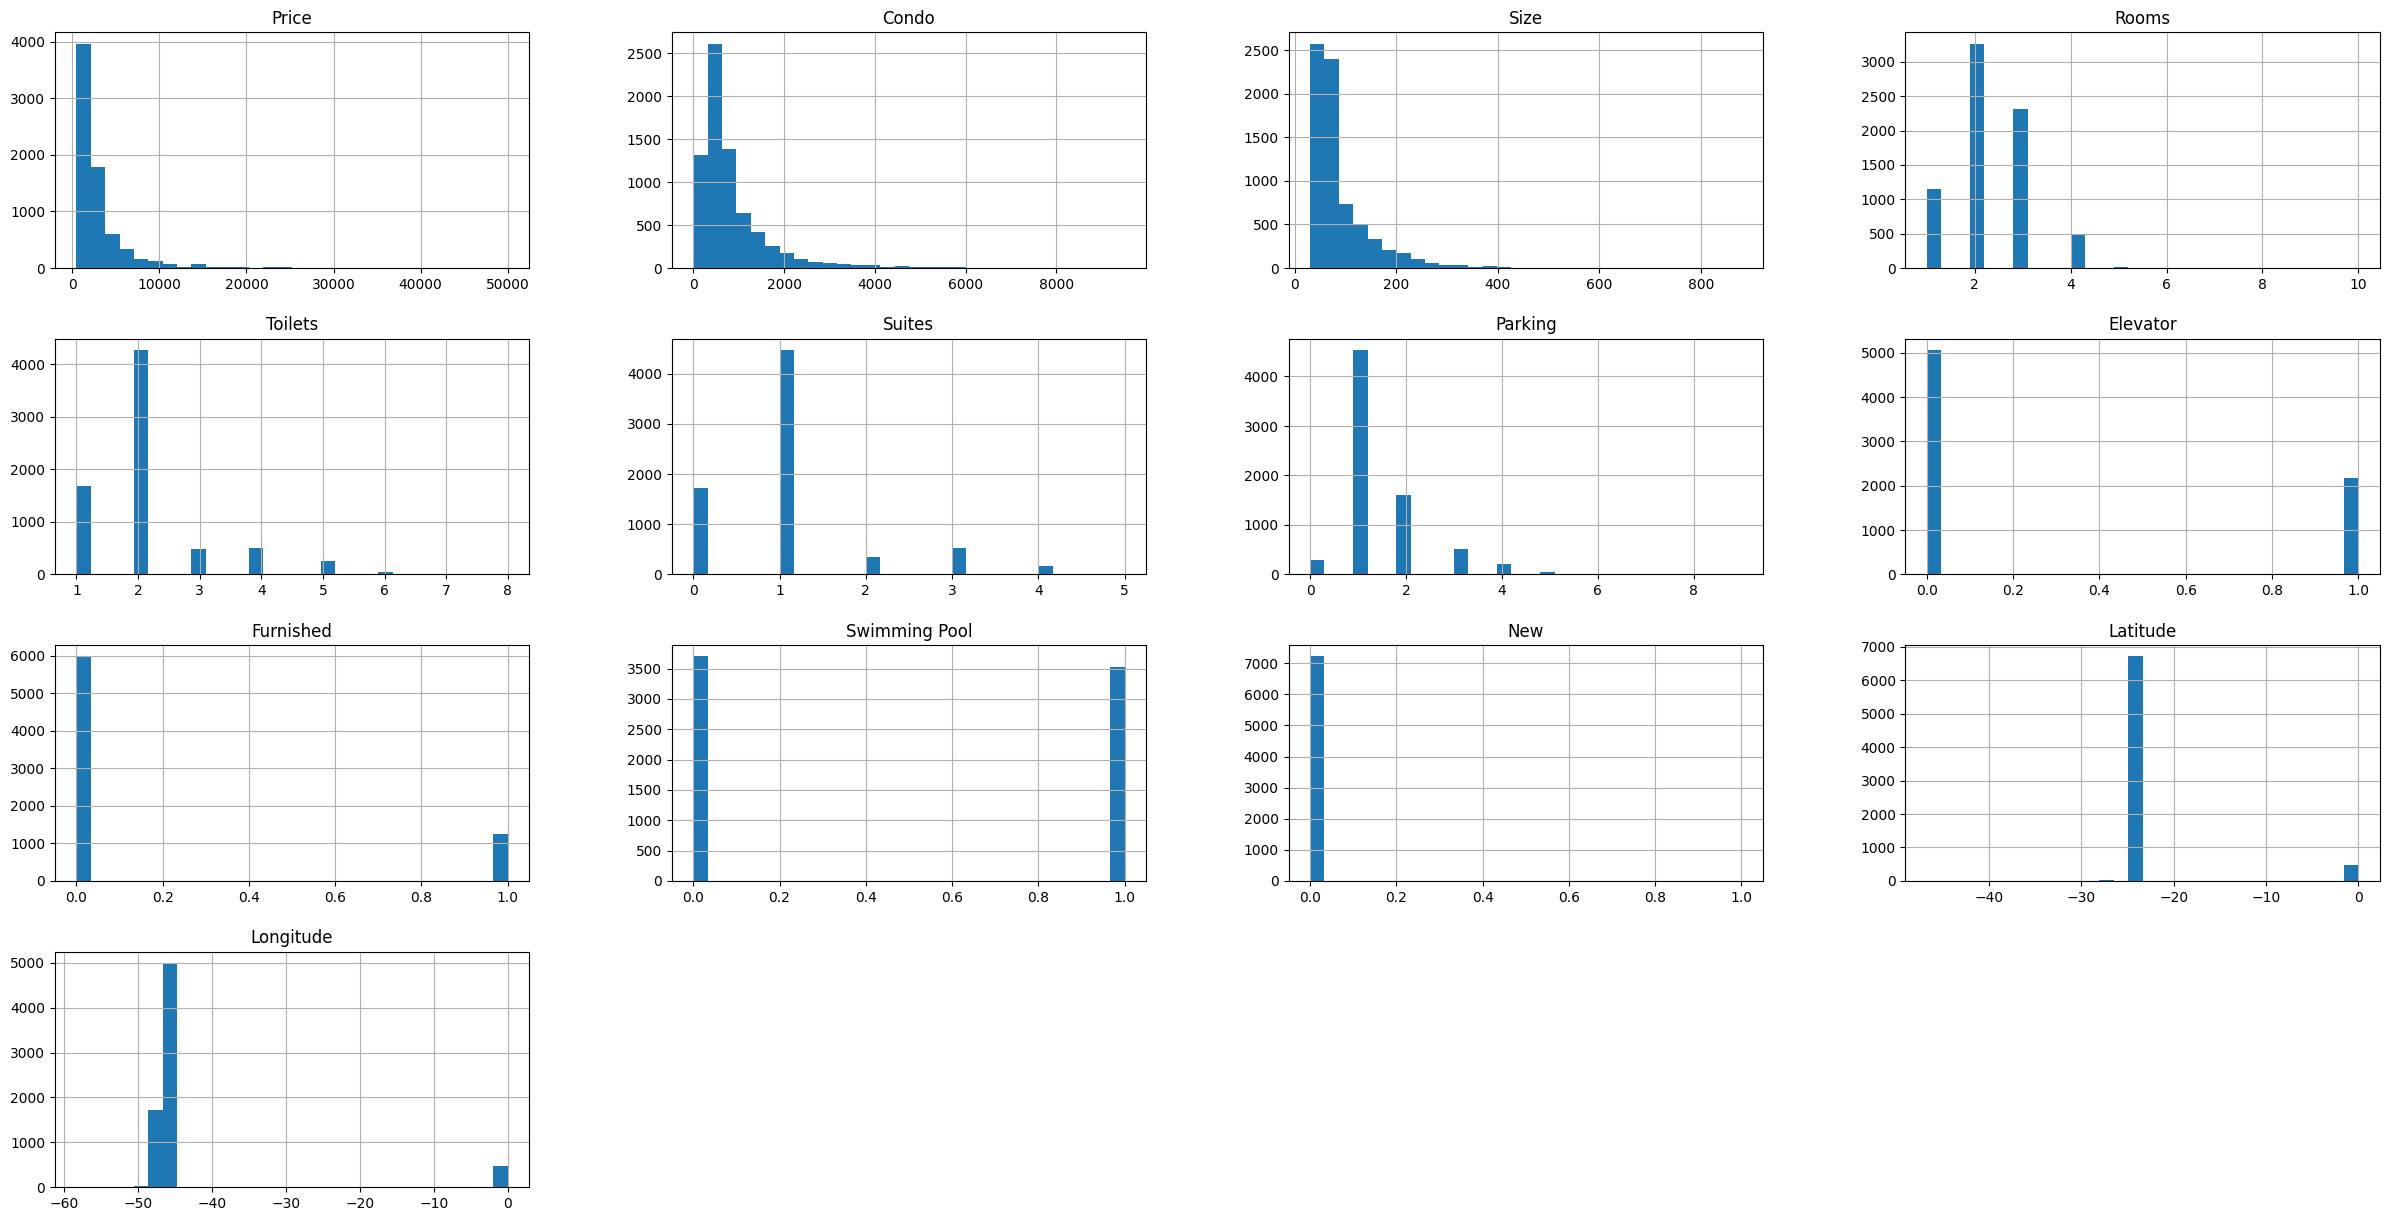

In [68]:
alugueis.hist(bins=30, figsize=(30,15))

In [69]:
alugueis['New'].value_counts()

,count
New,
0,7222
1,6


In [70]:
alugueis['Property Type'].value_counts()

,count
Property Type,
apartment,7228


In [71]:
alugueis['District'].value_counts()

,count
District,
Mooca/São Paulo,178
Moema/São Paulo,163
Vila Mariana/São Paulo,161
Morumbi/São Paulo,159
Pinheiros/São Paulo,153
...,...
Lajeado/São Paulo,8
Guaianazes/São Paulo,6
Parque do Carmo/São Paulo,6


In [72]:
alugueis.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Size,0.731795
Condo,0.700361
Parking,0.640743
Suites,0.588329
Toilets,0.583488
Rooms,0.390951
Swimming Pool,0.206884
Furnished,0.171859
Elevator,0.031860


# Limpeza de dados desnecessários

In [73]:
dados_limpos = alugueis.drop(['New', 'Property Type', 'Negotiation Type'], axis=1)

In [74]:
dados_limpos.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


# Tratamento de dados categóricos

In [75]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(dados_limpos[['District']])

district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [76]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

district_1hot = cat_encoder.fit_transform(dados_limpos[['District']])

district_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [77]:
district_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
district_1hot.toarray().shape

(7228, 94)

In [79]:
cat_encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

In [80]:
one_hot = pd.get_dummies(dados_limpos['District'], dtype=int)

dados_limpos = dados_limpos.drop('District', axis=1)

dados_limpos = dados_limpos.join(one_hot)

dados_limpos

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Selecionando e treinando os múltiplos modelos

## Separando os dados de treino e os dados de teste

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
Y = dados_limpos['Price']
X = dados_limpos.loc[:, dados_limpos.columns != 'Price']

In [83]:
X.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,...,0,0,0,0,0,0,0,0,0,0
1,148,45,2,2,1,1,0,0,0,-23.550239,...,0,0,0,0,0,0,0,0,0,0
2,100,48,2,2,1,1,0,0,0,-23.542818,...,0,0,0,0,0,0,0,0,0,0
3,200,48,2,2,1,1,0,0,0,-23.547171,...,0,0,0,0,0,0,0,0,0,0
4,410,55,2,2,1,1,1,0,0,-23.525025,...,0,0,0,0,0,0,0,0,0,0


In [84]:
Y.head()

,Price
0,930
1,1000
2,1000
3,1000
4,1300


In [85]:
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [86]:
from sklearn.metrics import mean_squared_error

## Regressão Linear

In [87]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, Y_train)

LinearRegression()

In [88]:
alguns_dados = X.iloc[:5]
alguns_precos = Y.iloc[:5]

print('Predições: ', lin_reg.predict(alguns_dados))
print('Valores Reais: ', list(alguns_precos))

Predições:  [ 886.49743652  820.87811279  897.95629883  911.56213379 1070.85955811]
Valores Reais:  [930, 1000, 1000, 1000, 1300]


In [89]:
preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(Y_train, preds)

lin_rmse = np.sqrt(lin_mse)
print(f'A predição está errando, em média, {lin_rmse} reais a cada previsão.')
# Underfitting

A predição está errando, em média, 1876.005320332176 reais a cada previsão.


## Decision Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(x_train, Y_train)

DecisionTreeRegressor()

In [91]:
alguns_dados_dtr = X.iloc[:5]
alguns_precos_dtr = Y.iloc[:5]

print(f'Predições: {tree_reg.predict(alguns_dados_dtr)}')
print(f'Valores Reais: {list(alguns_precos_dtr)}')

Predições: [1150. 1000. 1000. 1150. 1300.]
Valores Reais: [930, 1000, 1000, 1000, 1300]


In [92]:
preds_dtr = tree_reg.predict(x_train)
dtr_mse = mean_squared_error(Y_train, preds_dtr)

dtr_rmse = np.sqrt(dtr_mse)
print(f'A predição está errando, em média, {dtr_rmse} reais a cada previsão.')
# Overfitting

A predição está errando, em média, 33.25014335818602 reais a cada previsão.


## Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(x_train, Y_train)

RandomForestRegressor()

In [94]:
alguns_dados_rf = X.iloc[:5]
alguns_precos_rf = Y.iloc[:5]

print(f'Predições: {rf_reg.predict(alguns_dados_rf)}')
print(f'Valores Reais: {list(alguns_precos_rf)}')

Predições: [ 953.5   997.16  946.4   939.4  1213.5 ]
Valores Reais: [930, 1000, 1000, 1000, 1300]


In [95]:
preds_rf = rf_reg.predict(x_train)
rf_mse = mean_squared_error(Y_train, preds_rf)

rf_rmse = np.sqrt(rf_mse)
print(f'A predição está errando, em média, {rf_rmse} reais a cada previsão.')

A predição está errando, em média, 631.2675467375992 reais a cada previsão.


## Avaliação mais precisa Cross-Validation

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, Y_train, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(tree_rmse_scores)

Scores:  [2491.2869085  2059.09241779 2481.33352311 2711.63452924 2279.02159609
 2340.6415933  3010.54404095 1877.43493964 2323.53016868 2981.51930401]
Mean:  2455.603902130622
Standard Deviation:  347.18501705765345


In [97]:
scores = cross_val_score(lin_reg, x_train, Y_train, scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(lin_rmse_scores)

Scores:  [2262.34465655 1594.80099422 1985.60860072 2242.45900107 2064.50755942
 2084.94464849 1840.94467001 1739.92376799 1399.02933022 1780.74763179]
Mean:  1899.5310860476122
Standard Deviation:  265.44619339122


In [98]:
scores = cross_val_score(rf_reg, x_train, Y_train, scoring='neg_mean_squared_error', cv=10)

rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(rf_rmse_scores)

Scores:  [2099.63793758 1410.18883349 1715.07863807 2143.30465395 1670.14388381
 1919.03759086 1903.18627792 1579.29541403 1265.85190761 1636.23192736]
Mean:  1734.195706467101
Standard Deviation:  269.44905997674016


## Avaliando o modelo e otimizando-o

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train, Y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [101]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(Y_test, final_predictions)

final_rmse = np.sqrt(final_mse)
print(f'A predição está errando, em média, {final_rmse} reais a cada previsão.')

A predição está errando, em média, 1939.781851934481 reais a cada previsão.


In [105]:
fig = go.Figure(data=[go.Scatter(y=Y_test.values), go.Scatter(y=final_predictions)])
fig.show()